In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from sklearn.preprocessing import LabelEncoder

In [195]:
# Task 2 testing
df = pd.read_csv('../data/weatherAUS.csv')
df.drop(df[df['Location'] == 'Puerto Rico'].index, inplace=True)

In [196]:
# Task 3: get_start_end_date

# step 2. convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# step 3. get max date
max_date = df['Date'].max()

print(max_date)

2017-06-25 00:00:00


In [250]:
# Task 4: get_avg_min_temp_by_month(data)

# 1. clone
data_frame = df

# 2. convert date column to datetime again
df['Date'] = pd.to_datetime(df['Date'])

# 3. Make month column
df['Month'] = df['Date'].dt.month


# 4. groupby
group_df =  df.groupby('Month')

group_df.head()

# 5. average minTemp
avg_val = group_df['MinTemp'].mean()

avg_val


Month
1     17.463184
2     17.428630
3     15.865564
4     12.832589
5      9.662832
6      7.866533
7      6.983310
8      7.493249
9      9.488419
10    11.535550
11    14.306684
12    15.772154
Name: MinTemp, dtype: float64

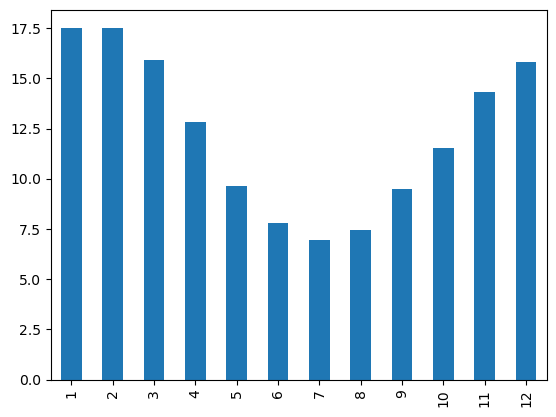

In [198]:
# Task 5: plot_avg_min_temp_by_month(avg_min_temp)

data = [17.535535, 17.503588, 15.913305, 12.843618,  9.640925,  
           7.818067,  6.944633,  7.459653,  9.466875, 11.531224, 14.321606, 15.811322]
avg_val = pd.Series(data=data, index=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# display a bar chart/histogram from a given series, using matplotlib-- x=months, y=avg min temp
avg_val.plot(kind='bar', x=avg_val.index, y=avg_val)
#cities_2019_df.plot(kind='bar', x='City', y='Population', title='Population of Cities in 2019', figsize=(10,6))

# save to plots folder
plt.savefig('../data/avg_min_temp_by_month.png')

In [251]:
# Task 6: Get Unique Cities

# number of unique cities
#pd.unique(df)

# group by location then count values
cities = df.groupby('Location')
val = cities['Location'].unique()#nunique().value_counts()


#val[1]

#cities.head()

# TEST EMPTY SET
empty_df = pd.DataFrame({'Location': []})
valtest = empty_df['Location'].unique()

#valtest
#len(val)
val

Location
Adelaide                    [Adelaide]
Albany                        [Albany]
Albury                        [Albury]
AliceSprings            [AliceSprings]
BadgerysCreek          [BadgerysCreek]
Ballarat                    [Ballarat]
Bendigo                      [Bendigo]
Brisbane                    [Brisbane]
Cairns                        [Cairns]
Canberra                    [Canberra]
Cobar                          [Cobar]
CoffsHarbour            [CoffsHarbour]
Dartmoor                    [Dartmoor]
Darwin                        [Darwin]
GoldCoast                  [GoldCoast]
Hobart                        [Hobart]
Katherine                  [Katherine]
Launceston                [Launceston]
Melbourne                  [Melbourne]
MelbourneAirport    [MelbourneAirport]
Mildura                      [Mildura]
Moree                          [Moree]
MountGambier            [MountGambier]
MountGinini              [MountGinini]
Newcastle                  [Newcastle]
Nhil            

In [200]:
# Task 7: Get Top Rainiest Cities

# sort dataframe by rainiest cities
rainiest = df.sort_values(by='Rainfall', axis=0, ascending=False)

#rainiestCities = rainiest['Location']#.unique()

rainiestCities = rainiest['Location'].unique()

list(rainiestCities[0:5])

#rainiestCities = rainiest['Location'].head(5)

#list(rainiestCities)
#rainiestCities
#maxgroup = df.groupby('Rainfall')
#maxgroup.idxmax()

['CoffsHarbour', 'Darwin', 'Cairns', 'Newcastle', 'Townsville']

In [201]:
# Task 8: Print Univariate Values
# Mean of 'Pressure9am'
mean = df['Pressure9am'].mean() # this is a float number
mode = df['Humidity9am'].mode() # this is a series, can make int
median = df['WindGustSpeed'].median() # number
stddev = df['Temp3pm'].std()

# percentile
#group = df.groupby('Rainfall').quantile(0.75)
quant = df['Rainfall'].quantile(0.75)

minMaxTemp = df['MaxTemp'].min()

"""Median of 'WindGustSpeed'
Standard deviation of 'Temp3pm'
75th percentile of 'Rainfall'
Minimum of 'MaxTemp'
Maximum of 'MinTemp'
Range of 'WindSpeed9am' (max - min)
Variance of 'Evaporation'
Skewness of 'Sunshine'"""

print(f"""Mean Pressure9am: {df["Pressure9am"].mean():.2f}
Mode Humidity9am: {float(df["Humidity9am"].mode()):.2f}
Median WindGustSpeed: {df['WindGustSpeed'].median():.2f}
Standard Deviation Temp3pm: {df['Temp3pm'].std():.2f}
75th Percentile Rainfall: {df['Rainfall'].quantile(0.75):.2f}
Minimum MaxTemp: {df['MaxTemp'].min():.2f}
Maximum MinTemp: {df['MinTemp'].max():.2f}
Range WindSpeed9am: {(df['WindSpeed9am'].max() - df['WindSpeed9am'].min()):.2f}
Variance Evaporation: {df['Evaporation'].var():.2f}
Skewness Sunshine: {df['Sunshine'].skew():.2f}
          """)

Mean Pressure9am: 1017.65
Mode Humidity9am: 99.00
Median WindGustSpeed: 39.00
Standard Deviation Temp3pm: 6.94
75th Percentile Rainfall: 0.80
Minimum MaxTemp: -4.80
Maximum MinTemp: 33.90
Range WindSpeed9am: 130.00
Variance Evaporation: 17.59
Skewness Sunshine: -0.50
          


C:\Users\K\AppData\Local\Temp\ipykernel_20368\3114883708.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Mode Humidity9am: {float(df["Humidity9am"].mode()):.2f}


In [202]:
# Task 9: Fix Missing Values
data = df
# example call: fix_missing_values(df, 'Rainfall')
median = df['col'].median()

df['col'] = df['col'].fillna(median)

KeyError: 'col'

In [181]:
# Task 10A: First Correlation
# correlation between MinTemp and RainFall

data = df


#data['MinTemp'].corr(data['Rainfall'])
corr_matrix_two = data[['MinTemp', 'Rainfall']].corr(method='pearson')
corr_matrix_two



,MinTemp,Rainfall
MinTemp,1.000000,0.103938
Rainfall,0.103938,1.000000


In [234]:

from scipy.stats import pearsonr, spearmanr


median = df['MinTemp'].median()

df['Rainfall'] = df['Rainfall'].fillna(median)

#(get_correlation_two_vars(df, 'MinTemp', 'Rainfall', type_correlation='pearson'))
#corr, p_value = pearsonr(df['MinTemp'], df['Rainfall'])
#corr, p_value
x = df['MinTemp']
y = df['Rainfall']
pearsonr(x, y)


ValueError: array must not contain infs or NaNs

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq\\backend\\cython\\checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\K\\Documents\\WSU\\Fall2024\\CS4580\\my-notes-kristina-br\\module4\\0         13.4\n1          7.4\n2         12.9\n3          9.2\n4         17.5\n          ... \n145455     2.8\n145456     3.6\n145457     5.4\n145458     7.8\n145459    14.9\nName: MinTemp, Length: 145460, dtype: float64vs0         0.6\n1         0.0\n2         0.0\n3         0.0\n4         1.0\n         ... \n145455    0.0\n145456    0.0\n145457    0.0\n145458    0.0\n145459    0.0\nName: Rainfall, Length: 145460, dtype: float64scatterplot2.png'

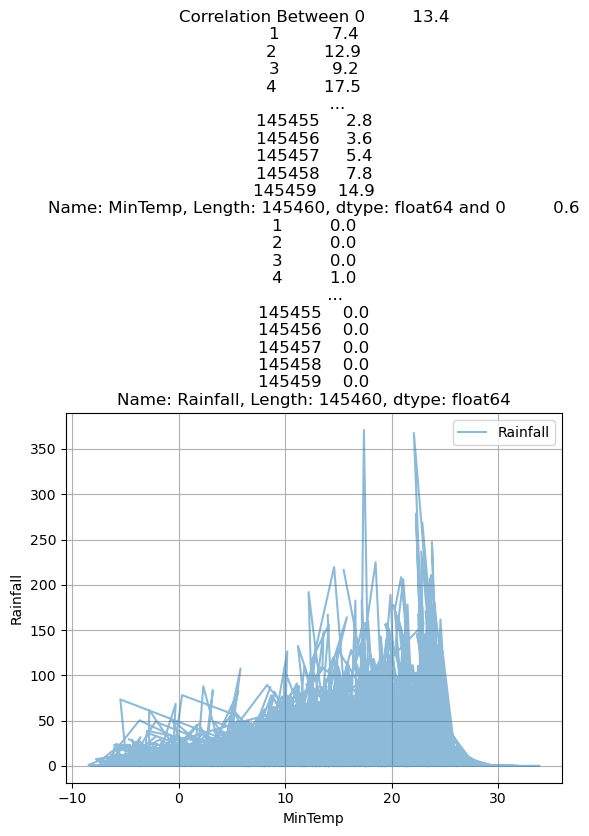

In [242]:
# Task 10C: Plot Correlation
# data, var1, var2, type_correlation='pearson'
import matplotlib.pyplot as plt
# plots a scatterplot
# homes_df.plot(x='List', y='Rooms', marker='o', markerfacecolor='r')


var1 = df['MinTemp']
var2 = df['Rainfall']
type_correlation = '2'

#data.plot(x=var1, y=var2, grid=True, alpha=0.5)
data.plot(x='MinTemp', y='Rainfall')
plt.title(f'Correlation Between {var1} and {var2}')
plt.xlabel('MinTemp')
plt.ylabel('Rainfall')
# save to plots folder
#plt.savefig('../data/avg_min_temp_by_month.png')
plt.savefig(f'{var1}vs{var2}scatterplot{type_correlation}.png')

In [ ]:
median = df['col'].median()

df['col'] = df['col'].fillna(median)

def get_correlation_two_vars(data, var1, var2, type_correlation='pearson'):
    from scipy.stats import pearsonr, spearmanr
    # TODO: Implement the function to get the correlation between two variables

    if type_correlation == 'pearson':
        corr, p_value = pearsonr(data[var1], data[var2], method='PermutationMethod')
    elif type_correlation == 'spearmanr':
        corr, p_value = spearmanr(data[var1], data[var2], method='PermutationMethod')

    return corr, p_value

In [243]:
def get_correlation_two_vars(data, var1, var2, type_correlation='pearson'):
    from scipy.stats import pearsonr, spearmanr
    # TODO: Implement the function to get the correlation between two variables

    corr_matrix_two = data[[var1, var2]].corr(method=type_correlation)
    #corr, p_value = pearsonr(final_df['is_canceled'], final_df['children'])

    if type_correlation == 'pearson':
        corr, p_value = pearsonr(data[var1], data[var2])
    elif type_correlation == 'spearmanr':
        corr, p_value = spearmanr(data[var1], data[var2])

    return corr, p_value

corr, p_value  = get_correlation_two_vars(data, 'MinTemp', 'Rainfall', type_correlation='pearson')

In [248]:
# FIX MISSING VALS FIRST
def fix_missing_values(data, column):
    #TODO: Implement the function to fix missing values
    median = data[column].median()

    data[column].fillna(median, inplace=True)
    pass

fix_missing_values(data, 'MinTemp')
fix_missing_values(data, 'Rainfall')

#corr, p_value = pearsonr(data['MinTemp'], data['Rainfall'])

correl = spearmanr(data['MinTemp'], data['Rainfall'])
correl

C:\Users\K\AppData\Local\Temp\ipykernel_20368\1411818840.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(median, inplace=True)


SignificanceResult(statistic=0.020141084297108692, pvalue=1.561776348799668e-14)

In [249]:
def plot_correlation(data, var1, var2, type_correlation='pearson'):
    # TODO: Implement the function to plot the correlation between two variables

    data.plot(x=var1, y=var2, grid=True, figsize=(10,6)) #alpha=0.5
    plt.title(f'Correlation Between {var1} and {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)

    plt.savefig(f'../data/{var1}vs{var2}scatterplot{type_correlation}.png')

    pass

plot_correlation

In [ ]:
# Task 11: Second Correlation
# data, col1, col2, type_correlation

#correlation between rainfall data of 5 locations

#corr, p_value = pearsonr(df['MinTemp'], df['Rainfall'])


# returns a tuple

In [292]:
# Task 11
import random
from scipy.stats import pearsonr, spearmanr

loc_list = list(df['Location'].unique())

loc_list

# get 5 randomly from list
rand_list = random.sample(loc_list, 5)

# use those 5 to filter into a new df
#five_df = df[df['Location'] == rand_list]

#df = df.loc[df.Income >= 50000]

#pull all rows where Location matches an item in rand_list
five_df = df.loc[(df.Location == rand_list[0]) | (df.Location == rand_list[1]) | (df.Location == rand_list[2]) 
                 | (df.Location == rand_list[3]) | (df.Location == rand_list[4])]


def fix_missing_values(data, column):
    median = data[column].median()

    data[column].fillna(median, inplace=True)
    pass

# correlation
fix_missing_values(five_df, 'Location')
#valsTest = five_df.corr(method='pearson')


TypeError: Cannot convert ['NorahHead' 'NorahHead' 'NorahHead' ... 'PerthAirport' 'PerthAirport'
 'PerthAirport'] to numeric

In [297]:
def get_correlation_two_vars(data, var1, var2, type_correlation='pearson'):
    """Calculate the correlation between two variables in a dataset.

    Args:
        data (pd.DataFrame): The dataset containing the variables.
        var1 (str): The name of the first variable.
        var2 (str): The name of the second variable.
        type_correlation (str, optional): The type of correlation to compute. 
            Options are 'pearson' (default) and 'spearman'.

    Returns:
        tuple: A tuple containing the correlation coefficient and the p-value.
    """

    from scipy.stats import pearsonr, spearmanr

    #corr_matrix_two = data[[var1, var2]].corr(method=type_correlation)
    #corr, p_value = pearsonr(final_df['is_canceled'], final_df['children'])

    if type_correlation == 'pearson':
        corr, p_value = pearsonr(data[var1], data[var2]) # if run outside of if logic, it runs ok
    elif type_correlation == 'spearman':
        corr, p_value = spearmanr(data[var1], data[var2])
    #corr, p_value = spearmanr(data[var1], data[var2])

    return corr, p_value

#typetest, val2 = get_correlation_two_vars(data, 'MinTemp', 'Rainfall', type_correlation='pearson')
#typetest, val2

correlations = ['pearson', 'spearman']
for correlation in correlations:
        corr, p_value  = get_correlation_two_vars(data, 'MinTemp', 'Rainfall', type_correlation=correlation)


corr, p_value

(0.020141084297108692, 1.561776348799668e-14)